# [3회차] 기초통계 과제

#### 1. 데이터 로드 및 구조 확인
- head(), info()로 데이터 구조 확인

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:

iris = sns.load_dataset('iris')

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2. 기술통계량
- Species별 Petal Length의 평균, 개수, 표준편차, 최소/최대, 사분위수 등을 출력하고 그룹별 데이터 개수를 확인하시오.

In [17]:
iris.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [18]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

#### 3. 시각화
- Species별 Petal Length의 분포를 Boxplot으로 시각화 하시오.
- 간단한 해석 작성

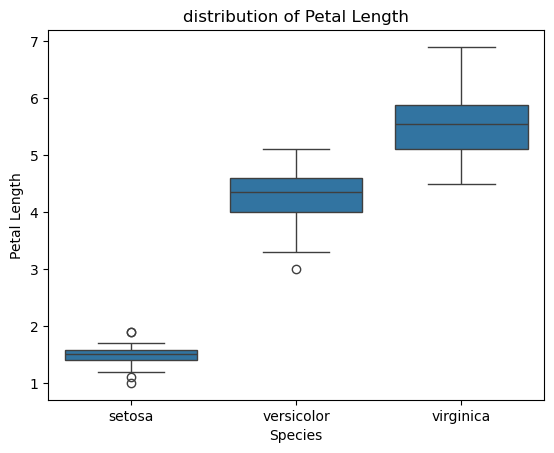

In [38]:
fig, ax = plt.subplots()
sns.boxplot(data=iris, x='species', y='petal_length', ax=ax)
ax.set_title('distribution of Petal Length')
ax.set_xlabel('Species')
ax.set_ylabel('Petal Length')
plt.show()

- 관찰
    - 종별로 꽃잎 길이에 유의미한 차이를 관찰할 수 있다
    - setosa는 분산이 작고, 나머지 두 종은 조금 더 크다

#### 4. 정규성 검정
- Species별로 Shapiro-Wilk 검정을 실시하시오.(해당 검정에 대한 가설 수립 포함)
- 각 species별 p-value 출력하고, 0.05를 기준으로 해석하시오.
    - (단, 이후 분석은 정규성을 만족한다고 가정한다.)
    - (Hint: scipy.stats.shapiro() 함수로 활용 가능)

In [ ]:
from scipy import stats

for species, group in iris.groupby('species'):
    stat, p_value = stats.shapiro(group['petal_length'])
    # H0(귀무가설): 데이터는 정규분포를 따른다.
    # H1(대립가설): 데이터는 정규분포를 따르지 않는다.
    # stat: Shapiro-wilk 통계량 = 데이터의 분포가 정규분포와 얼마나 유사한지
    # p-value: 귀무가설이 참이라는 전제 하에, 현재와 같은 데이터가 관찰될 확률
    if p_value > 0.05:
        print(f"{species}: p-value={p_value:.4f} -> 귀무가설 채택")
    else:
        print(f"{species}: p-value={p_value:.4f} -> 대립가설 채택")

setosa: p-value=0.0548 -> 귀무가설 채택
versicolor: p-value=0.1585 -> 귀무가설 채택
virginica: p-value=0.1098 -> 귀무가설 채택


#### 5. 등분산성 검정 (Levene)
- Levene 검정을 통해 3개 그룹 간 등분산성을 검정하시오.
- p-value를 출력하고, 0.05를 기준으로 해석하시오.
    - (단, 이후 분석은 등분산성을 만족한다고 가정한다.)
    - (Hint: scipy.stats.levene() 함수로 활용 가능)

In [58]:
# H0: 그룹 간 분산이 같다(등분산성 만족)
# H1: 적어도 하나의 그룹이 다른 그룹과 분산이 다르다(등분산성 불만족)
# stat: Levene 통계량 = 그룹 간 분산이 얼마나 유사한지
# p-value: 귀무가설이 참이라는 전제 하에, 현재와 같은 데이터가 관찰될 확률

groups = [group['petal_length'].values for _, group in iris.groupby('species')]
stat, p_value = stats.levene(*groups)

if p_value > 0.05:
    print(f"Levene 검정: p-value={p_value:.4f} -> 등분산성 만족")
else:
    print(f"Levene 검정: p-value={p_value:.4e} -> 등분산성 불만족")

Levene 검정: p-value=3.1288e-08 -> 등분산성 불만족


#### 6. ANOVA 가설 수립
- 아래 가설을 수립하시오.
    - H0: 세 species 간 ~~
    - H1: 적어도 ~~

- H0: 세 species 간 petal_length의 평균이 같다.
- H1: 적어도 하나의 그룹이 다른 그룹과 petal_length의 평균이 다르다.

#### 7. One-way ANOVA
- One-way ANOVA를 실시하시오.
- F값, p-value 확인
- 유의수준 0.05 기준으로 귀무가설 기각 여부를 쓰시오.

In [62]:
stat, p_value = stats.f_oneway(*groups)
print(f"F값: {stat:.4f}")
if p_value > 0.05:
    print(f"p-value={p_value:.4f} -> 귀무가설 채택")
else:
    print(f"p-value={p_value:.4e} -> 대립가설 채택")

F값: 1180.1612
p-value=2.8568e-91 -> 대립가설 채택


#### 8. 사후검정 (Tukey HSD)
- ANOVA 결과 유의하다면 Tukey HSD 사후검정을 실시하시오.
- 어떤 종 사이에 유의미한 차이가 있는지 정리

In [63]:
res = stats.tukey_hsd(*groups)
print(res)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.798     0.000    -3.002    -2.594
 (0 - 2)     -4.090     0.000    -4.294    -3.886
 (1 - 0)      2.798     0.000     2.594     3.002
 (1 - 2)     -1.292     0.000    -1.496    -1.088
 (2 - 0)      4.090     0.000     3.886     4.294
 (2 - 1)      1.292     0.000     1.088     1.496



- 세 그룹 간 Tukey HSD 수행 결과, 모든 관계에서 p-value < 0.05인것으로 볼때 각 종 사이의 꽃잎 길이는 통계적으로 유의미한 차이가 있다.

#### 9. 결과 요약
- Boxplot, ANOVA, 사후검정 결과를 종합하여 어떤 그룹의 Petal Length가 통계적으로 유의하게 긴지/짧은지 간단히 결론 지으시오.

- ANOVA 검정 수행 결과에서 알 수 있듯이, 적어도 하나 이상의 그룹에서 Petal Length에 대해 유의미한 차이가 있음을 알 수 있다.
- Tukey HSD 결과를 확인해보았을때, 모든 품종 쌍 간에 통계적으로 유의미한 차이가 있음을 알 수 있었고, 이는 Setosa < Versicolor < Virgiica 순이었다.
- 그리고 이는 Boxplot 그림에서도 확연하게 확인 가능하다.

#### 10. 회귀 분석
- 입력: sepal_length, sepal_width, petal_width
- 타겟: petal_length
- Train/Test 분리
- Linear Regression 학습
- MSE, R2, 회귀계수 출력 및 해석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")
coefficients = model.coef_
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: 회귀계수 = {coef:.4f}")

MSE: 0.1300
R2: 0.9603
sepal_length: 회귀계수 = 0.7228
sepal_width: 회귀계수 = -0.6358
petal_width: 회귀계수 = 1.4675
